Jovany Gonzalez <br>
CISB 62 - Midterm

<h2>Bird Identifier</h2>

For this project, I was thinking what if there was an image classifier that could identify birds. If done correctly it could be molded into an app that could be useful to bird watchers. The dataset has 20 different species of birds with a wide variety of images for each species. <br>

I used CNN as well as Keras for its Hyperparameters to help with training and testing <a href='https://www.kaggle.com/datasets/umairshahpirzada/birds-20-species-image-classification/data'>my dataset. </a>

In [156]:
# importing all important libraries
import keras
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D # new!
from keras.layers import Flatten
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [157]:
# make it easier on myself
batch = 32
image = (150, 150)

In [158]:
# getting our training set
# ask about seed
train = tf.keras.utils.image_dataset_from_directory(
    directory = 'data/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = batch,
    image_size = image
)

# getting our testing set
test = tf.keras.utils.image_dataset_from_directory(
    directory = 'data/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = batch,
    image_size = image
)

# getting our validation set
valid = tf.keras.utils.image_dataset_from_directory(
    directory = 'data/valid',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = batch,
    image_size = image
)

Found 3208 files belonging to 20 classes.
Found 100 files belonging to 20 classes.
Found 100 files belonging to 20 classes.


In [159]:
# https://www.tensorflow.org/tutorials/load_data/images
# tf documentation was really helpful
for image_batch, labels_batch in train:
    print(f"Train shape: {image_batch.shape}")
    print(f"Train label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in valid:
    print(f"Validation shape: {image_batch.shape}")
    print(f"Validation label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in test:
    print(f"Test shape: {image_batch.shape}")
    print(f"Test label: {labels_batch.shape}\n")
    break

Train shape: (32, 150, 150, 3)
Train label: (32,)

Validation shape: (32, 150, 150, 3)
Validation label: (32,)

Test shape: (32, 150, 150, 3)
Test label: (32,)



In [160]:
# checking the various class names
# the valid and testing folders have the same names
class_names = train.class_names
print(f"Here are all the Training Class Names: \n{class_names}")

Here are all the Training Class Names: 
['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL']


In [161]:
len(class_names)

20

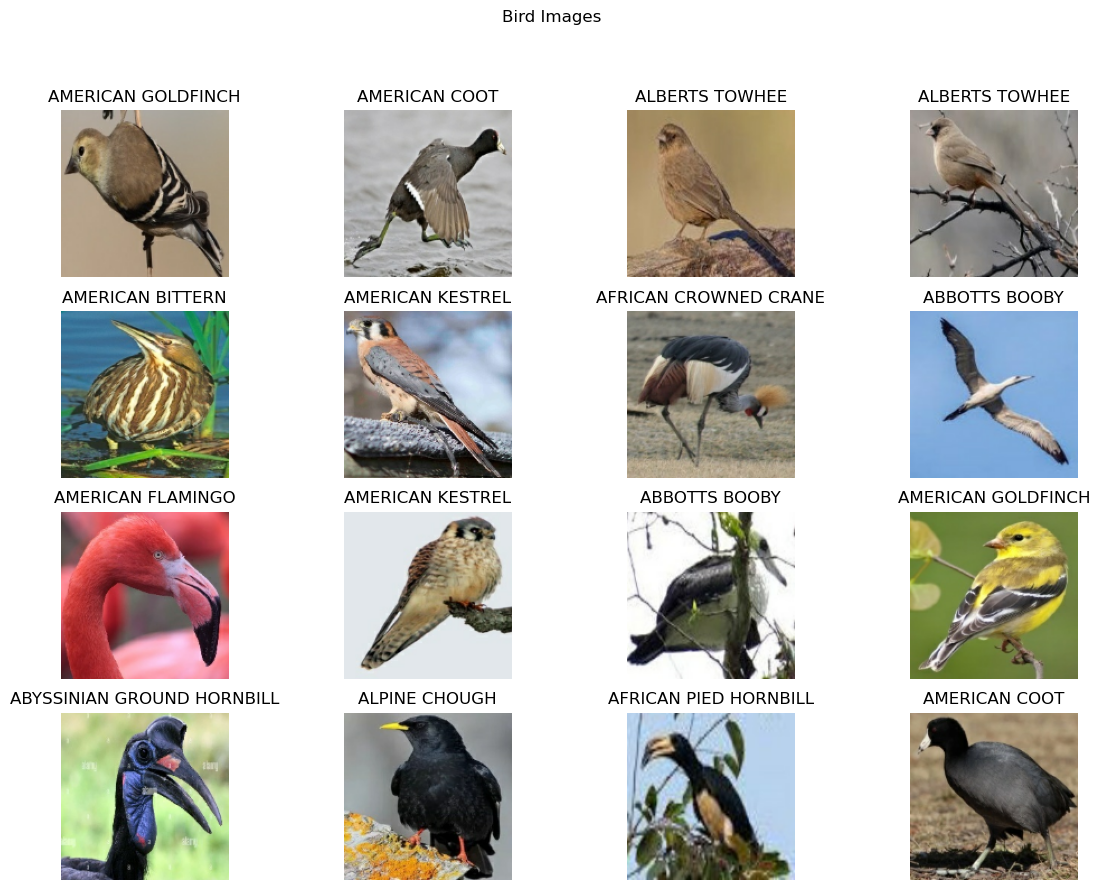

In [162]:
# iterating through the training dataset to see what images we will be working with
plt.figure(figsize=(14, 10))
for images, labels in train.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.suptitle('Bird Images', x=0.5, y=0.98)
plt.show()


In [163]:
# # according to keras documentation, this will help prevent bottlenecking and helps prevent with performance issues
# AUTOTUNE = tf.data.AUTOTUNE

# train_at = train.cache().prefetch(buffer_size=AUTOTUNE)
# valid_at = valid.cache().prefetch(buffer_size=AUTOTUNE)

In [233]:
# normalizing the dataset 
# doing this will rescale the dataset and be a lot more easier to use

normalization_layer = Rescaling(1./127.5, offset=-1)

In [239]:
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


-1.0 1.0


In [301]:
# Creating our model(s) 
# Will be using CNN and ANN to compare

num_classes = len(class_names)

# sequential model
model = Sequential(Rescaling(1./127.5, offset=-1, input_shape=(150, 150, 3)))

# first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# second convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# maxpooling2d layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# adding dropout to prevent overfitting
model.add(Dropout(0.4))

# flattening out the data from three dimensional to one dimensional array
model.add(Flatten())

# adding hidden layer
model.add(Dense(128, activation='relu'))

# adding another dropout layer
model.add(Dropout(0.4))

# output layer
model.add(Dense(num_classes, activation='softmax'))

In [302]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 73, 73, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 170528)            0         
                                                      

In [303]:
# compiling our model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [304]:
# fitting our model
model.fit(train, validation_data=valid, batch_size=64, epochs=10, verbose =1)

Epoch 1/10
101/101 [==============================] - 209s 2s/step - loss: 2.8497 - accuracy: 0.1699 - val_loss: 2.1689 - val_accuracy: 0.3200
Epoch 2/10
101/101 [==============================] - 229s 2s/step - loss: 1.9323 - accuracy: 0.4049 - val_loss: 1.3760 - val_accuracy: 0.5700
Epoch 3/10
101/101 [==============================] - 174s 2s/step - loss: 1.2245 - accuracy: 0.6188 - val_loss: 1.0211 - val_accuracy: 0.7200
Epoch 4/10
101/101 [==============================] - 158s 2s/step - loss: 0.7278 - accuracy: 0.7653 - val_loss: 1.0435 - val_accuracy: 0.6600
Epoch 5/10
101/101 [==============================] - 156s 2s/step - loss: 0.4789 - accuracy: 0.8435 - val_loss: 0.9029 - val_accuracy: 0.7500
Epoch 6/10
101/101 [==============================] - 165s 2s/step - loss: 0.3581 - accuracy: 0.8812 - val_loss: 0.9105 - val_accuracy: 0.7400
Epoch 7/10
101/101 [==============================] - 160s 2s/step - loss: 0.2928 - accuracy: 0.9040 - val_loss: 0.7786 - val_accuracy: 0.8000

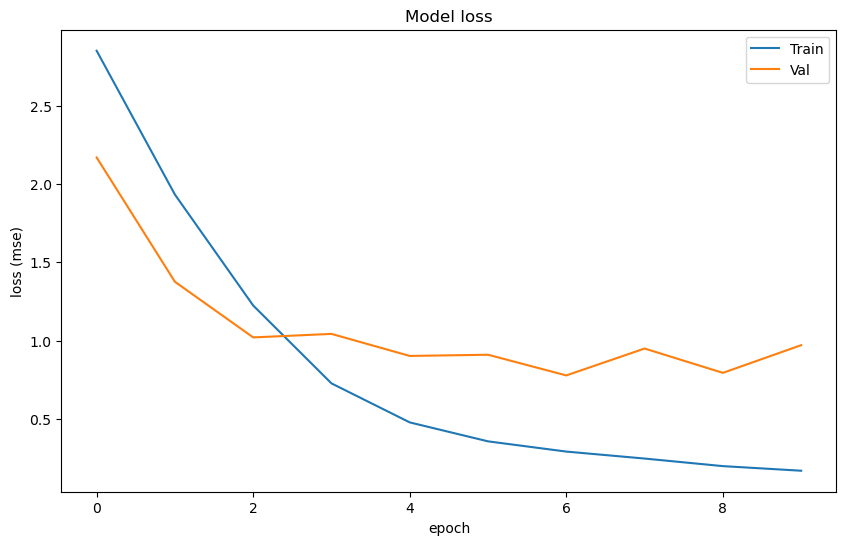

In [305]:
# plotting loss
plt.figure(figsize=(10,6))
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['Train', 'Val'], loc='upper right')

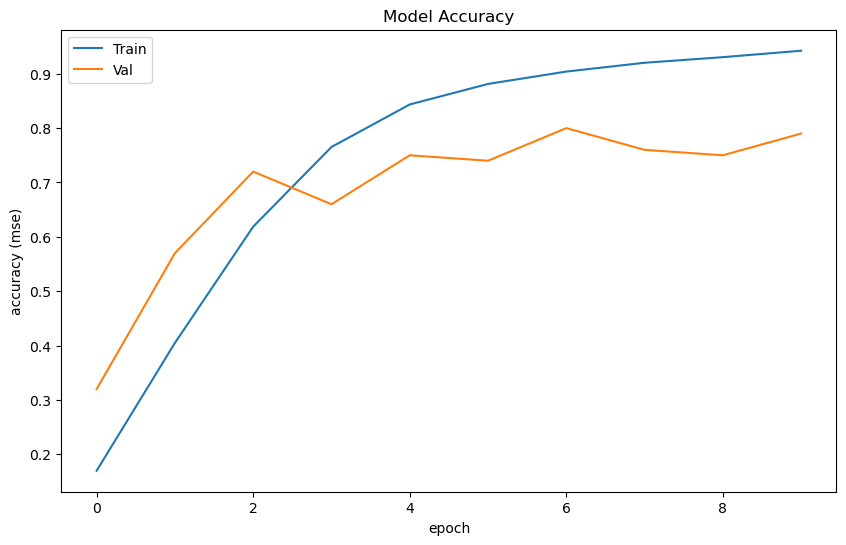

In [306]:
# plotting accuracy
plt.figure(figsize=(10,6))
plt.plot(model.history.history['accuracy'][:])
plt.plot(model.history.history['val_accuracy'][:])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy (mse)')
plt.legend(['Train', 'Val'], loc='upper left')

It appears that I overfitted the model a bit. While I was able to get the training set to properly form, the validation dataset will not back it up currently. I might've over done it while I was building the model and when I tried to fit it. Currently 